https://vgpena.github.io/classifying-tweets-with-keras-and-tensorflow/

En el anterior enlace, tenéis un ejemplo sobre cómo, a partir de tweets con un label específico (un sentimiento, positivo o negativo): 

1. Genera un conjunto de entrenamiento. El conjunto de entrenamiento es formado a partir de tweets completos pasados a un array con un tamaño específico.
2. Ese array (X_train de tamaño N) tiene un label que representa el sentimiento (y_train)
3. Como todas las frases tienen un tamaño N, la entrada de la red neuronal será de tamaño N y la salida de la red será de tamaño 2 usando activación softmax(porque hay dos clases).

Se pide: 

- Realizar un clasificador de reviews para el dataset de IMDB de la carpeta data_exercise/

**Cuando usa la importación "keras.x", reemplázalo por "tensorflow.keras.x"**

In [3]:
# Your code
"""
De
from keras.preprocessing.text import Tokenizer
Usa
from tensorflow.keras.preprocessing.text import Tokenizer
"""


&#39;\nDe\nfrom keras.preprocessing.text import Tokenizer\nUsa\nfrom tensorflow.keras.preprocessing.text import Tokenizer\n&#39;

In [1]:
# Importamos librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import tensorflow as tf
from  tensorflow import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


import warnings 
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
import tensorflow.keras.preprocessing.text as kpt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers, losses
from tensorflow.keras.layers import Embedding

In [2]:
# Cargamos el dataset
training = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/DeepLearning/data_exercise/IMDB Dataset.csv")
training

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:

# Crear nuestros datos de entrenamiento a partir de sentiment(positive-negative)
X_train = training.review
# Indexar todas las etiquetas de sentimient. Nos sirve para entrenar nuestra segunda neurona, después de aplicar embending.
y_train = training.sentiment


In [4]:
# Observamos que nuestro y_train tiene positivo y negativo
y_train.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
# Convertimos en array
X_train.values
y_train.values

array(['positive', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [6]:
# 1._Convertimos ese positivo y negativo en clases. Es igual que hacer labelEncoder (Hay diferentes formas de aplicar el labelEncoder)
y_train = y_train.apply(lambda x: 1 if x == "positive" else 0)
y_train.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [53]:
# APLICAR LABELENCODER a y_train
le = LabelEncoder()
train_labels = le.fit_transform(y_train)
# train_labels = y_train

In [15]:
#############
# 2._ OTRA FORMA DE APLICAR LABELENCODER
y_train = np.asarray(y_train)
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
# 3._ OTRA FORMA DE APLICAR LABELENCODER
# tratar las etiquetas como categorías 
y_train = keras.utils.to_categorical(y_train)
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
#############

In [7]:
# Nuestro número de filas son 50000, voy a tomar todas para el ejercicio. Cada fila representa en este caso una frase.
max_words = 50000
# Creamos nuevo Tokenizer
tokenizer = Tokenizer(num_words=max_words)
# Alimentar nuestros tweets con Tokenizer
tokenizer.fit_on_texts(X_train)

In [8]:
# Tokenizers vienen con el inconveniente que es una lista de palabras. Hay que identificar todas las palabras y asignar una etiqueta o número.
dictionary = tokenizer.word_index
# Guardemos esto para poder usarlo más tarde.
with open('dictionary.json', 'w') as dictionary_file:
    json.dump(dictionary, dictionary_file)

In [9]:
# Mostramos lo que es dictionary
dictionary # da valor a todas las palabra de cada listas, es lo que hace tokenizer

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'he': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'so': 34,
 'who': 35,
 'from': 36,
 'like': 37,
 'or': 38,
 'just': 39,
 'her': 40,
 'out': 41,
 'about': 42,
 'if': 43,
 "it's": 44,
 'has': 45,
 'there': 46,
 'some': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'my': 56,
 'even': 57,
 'would': 58,
 'she': 59,
 'which': 60,
 'only': 61,
 'really': 62,
 'see': 63,
 'story': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'me': 68,
 'well': 69,
 'were': 70,
 'than': 71,
 'much': 72,
 'we': 73,
 'bad': 74,
 'been': 75,
 'get': 76,
 'do': 77,
 'great': 78,
 'other': 79,
 'will': 80,
 'also': 81,
 'into': 82,
 'p

In [10]:
def convert_text_to_index_array(text):
     # una cosa realmente importante que `texto_a_secuencia_de_palabras` hace que todos los textos
     # tengan la misma longitud... en este caso, la longitud del texto más largo del conjunto.
    return [dictionary[word] for word in kpt.text_to_word_sequence(text)]

In [11]:
allWordIndices = []
# para cada palabra, cambia cada token a su ID en el índice de palabras del Tokenizer
for text in X_train:
    wordIndices = convert_text_to_index_array(text)
    allWordIndices.append(wordIndices)
  

# Ahora tenemos una lista de todos las palabras convertidas a matrices de índices.
# Tenemos una matriz para su futuro uso.
allWordIndices = np.asarray(allWordIndices)



In [12]:
allWordIndices # Este es el array de la lista de tweet

array([list([27, 4, 1, 79, 2102, 45, 1072, 12, 100, 147, 39, 307, 3184, 398, 474, 26, 3195, 33, 23, 203, 14, 11, 6, 621, 48, 596, 16, 68, 7, 7, 1, 86, 148, 12, 3241, 68, 42, 3184, 13, 92, 5398, 2, 15115, 134, 4, 570, 60, 268, 8, 203, 36, 1, 661, 139, 1740, 68, 11, 6, 21, 3, 119, 15, 1, 7888, 2333, 38, 11469, 11, 119, 2595, 54, 5911, 16, 5510, 5, 1479, 376, 38, 570, 92, 6, 3804, 8, 1, 360, 356, 4, 1, 661, 7, 7, 9, 6, 433, 3184, 14, 12, 6, 1, 11648, 358, 5, 1, 15701, 6813, 2538, 1064, 56309, 9, 2711, 1421, 20, 23546, 538, 32, 4636, 2468, 4, 1, 1208, 117, 29, 1, 7017, 25, 2970, 11964, 2, 391, 56310, 34, 16740, 6, 21, 299, 20, 1, 4910, 7364, 538, 6, 344, 5, 106, 25421, 8161, 42636, 14813, 5050, 7889, 2453, 2, 51, 34, 48042, 327, 9106, 7365, 12486, 2, 8697, 33191, 23, 110, 225, 243, 7, 7, 10, 58, 131, 1, 280, 1324, 4, 1, 119, 6, 693, 5, 1, 192, 12, 9, 269, 117, 79, 276, 589, 3024, 834, 180, 1320, 4161, 15, 2523, 1243, 834, 1443, 834, 887, 3184, 149, 954, 183, 1, 86, 398, 10, 123, 210, 3241,

In [13]:
# crear matrices de una sola vez a partir de las palabras indexadas
X_train = tokenizer.sequences_to_matrix(allWordIndices, mode='binary')


In [59]:
X_train.shape

(50000, 50000)

In [61]:
y_train = keras.utils.to_categorical(y_train)

In [62]:
y_train.shape

(50000, 2, 2, 2, 2)

In [14]:
# Comprobar que X_train en la posición 0, posición 1 ... son diferentes
print("X_train en la posición 0",X_train[0])
print("X_train en la posición 1",X_train[1])

print("Son iguales los arrays -->    ",(X_train[0] == X_train[1]).all())

X_train en la posición 0 [0. 1. 1. ... 0. 0. 0.]
X_train en la posición 1 [0. 1. 1. ... 0. 0. 0.]
Son iguales los arrays -->     False


In [30]:

# Generar una función para poder utilizar el modelo
# CREAR EL MODELO:   es hora de crear nuestra red neuronal con embedding
embedding_dim = 16
max_features = 100 # <-- para que tarde menos he aplicado 100, lo ideal sería 50000
sequence_length = 250

vectorize_layer = TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

#Representa una frase con unos números para poder luego añadir y predecir frases nuevas   
model = tf.keras.Sequential([
layers.Embedding(max_words, embedding_dim, name = "embeding"),
layers.GlobalAveragePooling1D(),
layers.Dense(16, activation ="relu"),
layers.Dense(1)])


model.summary()





Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeding (Embedding)         (None, None, 16)          800000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 800,289
Trainable params: 800,289
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics= ["CategoricalAccuracy"])

# Intenta hacer arrays que represente en formato array y cada frase tiene un array diferente
hist_model = model.fit(X_train, train_labels,  # <--- train_labels es el y_train aplicando labelencoder
batch_size=32,
epochs=3,  # No aplico más epochs porque tarda demasiado 
verbose=1,
shuffle=False)   # suffle poner False porque desordena y ordena X_train(Embleding) de manera diferente a y_train


Epoch 1/3
1563/1563 [==============================] - 141s 90ms/step - loss: 5.9605e-08 - categorical_accuracy: 1.0000
Epoch 2/3
1563/1563 [==============================] - 141s 90ms/step - loss: 5.9605e-08 - categorical_accuracy: 1.0000
Epoch 3/3
1563/1563 [==============================] - 140s 90ms/step - loss: 5.9605e-08 - categorical_accuracy: 1.0000


In [25]:
model.save("embeding_sentiment.h5")  # modelos de tensorflow se guardan en formato h5

In [ ]:
# abrir modelo -->buscar
new_model = tf.keras.models.load_model('embeding_sentiment.h5')
new_model.summary()

In [26]:
hist_model.history.keys()

dict_keys(['loss', 'categorical_accuracy'])

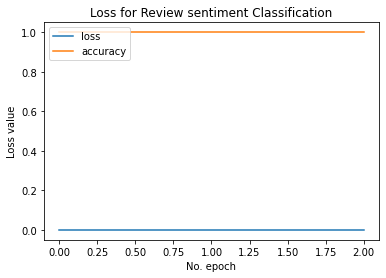

In [27]:
# Nota: Si sólo tienes aplicado Epoch = 1 se crea un punto en la gráfica.

plt.plot(hist_model.history['loss'], label='loss')
plt.plot(hist_model.history['categorical_accuracy'], label='accuracy')
plt.title('Loss for Review sentiment Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

## Cómo aplicamos el embendig en nuestra red neuronal:
En input_shape=(None,embedding_dim)

In [64]:
# SEGUNDA RED: RED DE CLASIFICACIÓN
# Modelo

# Keras Sequential()es un tipo simple de red neuronal que consiste en una "pila" de capas ejecutadas en orden.
model_clasificador = Sequential()
model_clasificador.add(Dense(512, input_shape=(None,embedding_dim), activation='relu'))
model_clasificador.add(Dropout(0.5))
model_clasificador.add(Dense(256, activation='sigmoid'))
model_clasificador.add(Dropout(0.5))
model_clasificador.add(Dense(2, activation='softmax')) # --> se aplica porque hay dos clases. La suma total tiene que ser 100%
# el input son los arrays que pertenecen a cada frase

model_clasificador.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])


hist_model_clasificador = model_clasificador.fit(X_train, train_labels,
  batch_size=32,
  epochs=5,
  verbose=1,
  validation_split=0.1,
  shuffle=True)






Epoch 1/5


ValueError: in user code:

    /Users/elsa/Library/Python/3.8/lib/python/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Users/elsa/Library/Python/3.8/lib/python/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/elsa/Library/Python/3.8/lib/python/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/elsa/Library/Python/3.8/lib/python/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/elsa/Library/Python/3.8/lib/python/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/elsa/Library/Python/3.8/lib/python/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Users/elsa/Library/Python/3.8/lib/python/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /Users/elsa/Library/Python/3.8/lib/python/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /Users/elsa/Library/Python/3.8/lib/python/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_20 is incompatible with the layer: expected axis -1 of input shape to have value 16 but received input with shape [None, 50000]


In [51]:
## HE SIDO INCAPAZ DE RESOLVERLO DE ESTA FORMA

# Cómo entrenar su red
hist_model_clasificador = model_clasificador.fit(model.get_layer('embeding').get_weights(), y_train,
batch_size=32,
epochs=3,
verbose=1,
validation_split=0.1,
shuffle=True)

#model.get_layer('retinanet').get_layer(p_name).output

TypeError: 'Embedding' object is not subscriptable

In [ ]:
build_model_clasificacion()

In [46]:
hist_model.history.keys()

dict_keys(['loss', 'categorical_accuracy'])

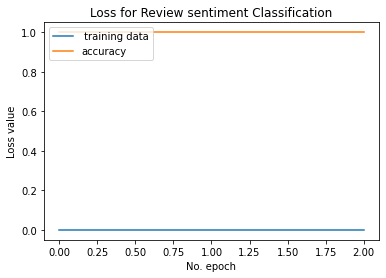

In [47]:
plt.plot(hist_model.history['loss'], label=' training data')
plt.plot(hist_model.history['categorical_accuracy'], label='accuracy')
plt.title('Loss for Review sentiment Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

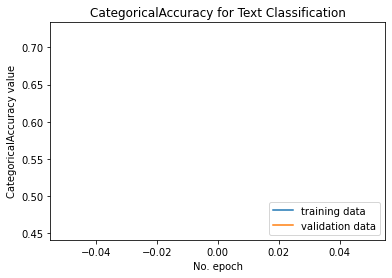

In [113]:
plt.plot(hist_model.history['val_loss'], label='training data')
plt.plot(hist_model.history['val_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [ ]:
NO ES MUY LÓGICO QUE EL MODELO ESTÉ BIEN, LA VALIDACIÓN HA DE QUEDAR SIEMPRE POR DEBAJO 

In [247]:
# Guardamos el modelo
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('model.h5')

In [ ]:
PARTE DE PREDICT

In [31]:
#Genearamos frase nueva
test= "this was a horrible movie"

In [32]:
convert_text_to_index_array(text)

[54,
 27,
 5892,
 1,
 324,
 2191,
 97,
 5,
 26,
 299,
 503,
 18,
 1,
 455,
 77,
 525,
 3,
 17,
 12,
 6,
 14,
 49,
 14,
 47,
 4,
 1,
 116,
 699,
 479,
 11,
 17,
 66,
 3,
 5138,
 3849,
 111,
 12,
 39,
 312,
 68,
 9812,
 11,
 6,
 31,
 225,
 1,
 246,
 4,
 1,
 2953,
 34,
 225,
 97,
 57,
 1,
 575,
 5,
 103,
 1,
 69,
 551,
 102,
 6418,
 8,
 157,
 17,
 185,
 586,
 11,
 17,
 585,
 1,
 2751,
 134,
 16,
 4256,
 5429,
 2,
 6964,
 30,
 34400,
 7,
 7,
 10,
 58,
 131,
 11,
 17,
 6,
 21,
 278,
 3,
 2257,
 2,
 1032,
 278,
 147,
 188,
 15,
 1,
 289,
 326,
 35,
 755,
 5,
 63,
 29,
 1,
 97,
 2584,
 11,
 17,
 6,
 42,
 1,
 61,
 95,
 474,
 63,
 9,
 57,
 1,
 1898,
 4435,
 794,
 11,
 17]

In [ ]:
allWordIndices = []
# para cada tweet, cambia cada token a su ID en el índice de palabras del Tokenizer
for text in X_train:
    wordIndices = convert_text_to_index_array(text)
    allWordIndices.append(wordIndices)
# Ahora tenemos una lista de todos los tweets convertidos a matrices de índices.
# Tenemos una matriz para su futuro uso.
allWordIndices = np.asarray(allWordIndices)

In [ ]:
# Utilizamos red de embending para hacer fit


